
# A Machine Learning Approach to Cardiotocography Interpretation
### Authors: Holly Figueroa & Karlie Schwartzwald

## Notes for Karlie:
I have added a summary to guide the typical EDA and moved the Assignment Outline to the end of the doc. 
 
One thing I noted, that I am not sure about, is that between the correlated features of histogram mean, median, and mode is that mode has the higheset correlation to our target. I am wondering if that would make it a more favorable variable to keep instead of the mean. I found one resource that suggests the higher correlation to the target the better.  I have also read that chosing one with the highest covariance is preferrable. 
 
https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a
 
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjlkPSH08z8AhXJhYkEHYvJC2IQFnoECBkQAw&url=https%3A%2F%2Fdatascience.stackexchange.com%2Fquestions%2F94887%2Fa-feature-highly-correlated-with-target-variable&usg=AOvVaw3hivliGVX328l3jjURoxoE  

I have also read correlated features as low as .70 can be considered problematic enough for removal. We might want to geek out on this a little, but I think 90% is a pretty reasonable choice. 

I noticed that point biserial corrlations are not listed in the method options for corr(), but when digging more on it, It appears this particular method is for correlating a binary (or dichotomous) feature with the continuous one. So, I think kendall's tau is the one we want for most cases. 

Was dgging in to the topic of scaling/normalizing because the more I dig into it, the less I know lol. Seems to depend on the model (non-tree models), but it seems scaling data 0-1 isn't reall enough if the data is heavily skewed. So I'll be trying to figure out which variables need what and I will note that in the write-ups if I feel confident about what they need. 

### Response to Holly: 1/21/2023  

Great work on this stuff Holly I'm so impressed with your work!  

- Agreed, lets keep the mode instead
- kendall's tau is great I agree
- I think this document has a lot of good information but isn't the most readable. I am going to try to clean it up a bit and add comentary so that it flows well

## Milestone 3 - Preliminary Analysis

### Summary Objective
Our goals is to explore data and prepare it for modeling. Data will be used to train two models, A neural network and naive Bayes classifier to predict our multinomial target "fetal_health". These models can be sensative to outliers,imbalanced data, unscaled data, and non-normalized data. 

* How are our variables distributed
* What variables should kept or removed and why
* What variables require scaling or normalization 
* Do any variables have missing data/How will we handle missing data
* Rationale for the non-removal of outliers


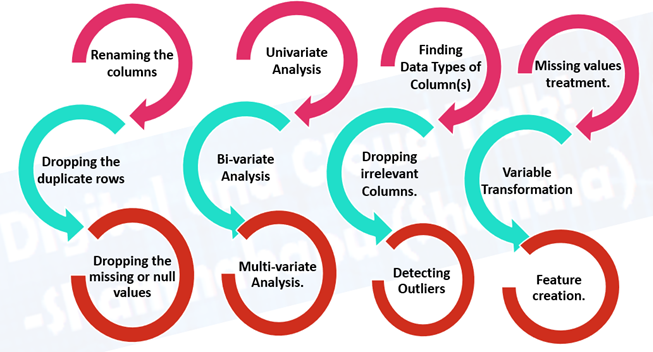

First we will import our data and libraries, then we will examine a sample of the dataframe.

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from brokenaxes import brokenaxes

In [174]:
# Load data and view
fetal_health = pd.read_csv('fetal_health.csv')
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


We will also edit the column names for readability and typos, as well as creating a dictionary of descriptions for our variables for easy reference. 

In [175]:
# Review column names for any edits
fetal_health.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [176]:
# Correct typos and inconsistencies on column names
fetal_health.rename({
                    'prolongued_decelerations':'prolonged_decelerations',
                    'abnormal_short_term_variability':'pc_short_term_ab_variability', 
                    'mean_value_of_short_term_variability':'mean_short_term_variability', 
                    'percentage_of_time_with_abnormal_long_term_variability':'pc_long_term_ab_variability',
                    'mean_value_of_long_term_variability':'mean_long_term_variability',
                    'histogram_number_of_peaks':'histogram_peak_count',
                    'histogram_number_of_zeros':'histogram_zero_count'
                    }, axis = 1, inplace = True)

In [177]:
# Create a list of descriptions for each column to create a reference table
info = [
        'baseline hear beats per minute', 
        'accelerations per second',
        'fetal movements per second',
        'uterine contractions per second',
        'light decelerations per second',
        'severe decelerations per second',
        'prolonged decelerations per second',
        'percentage of time with abnormal short term variability',
        'mean value of short term variability',
        'percentage of time with abnormal long term variability',
        'mean value of long term variability',
        'width of the fetal heart rate histogram',
        'minimum of fetal heart rate histogram',
        'maximum of FHR histogram',
        'number of histogram peaks',
        'number of histogram zeros',
        'histogram mode',
        'histogram mean',
        'histogram median',
        'histogram variance',
        'histogram tendency',
        'fetal state class code: N=normal   S=suspect  P=pathologic'
       ]

In [178]:
var_info = pd.DataFrame({'Variable Name': fetal_health.columns,'Description': info})

In [179]:
# Display variables and their descriptions for reference
with pd.option_context('display.max_colwidth', None):
  display(var_info.style.set_properties(**{'text-align': 'left'}))

,Variable Name,Description
0,baseline value,baseline hear beats per minute
1,accelerations,accelerations per second
2,fetal_movement,fetal movements per second
3,uterine_contractions,uterine contractions per second
4,light_decelerations,light decelerations per second
5,severe_decelerations,severe decelerations per second
6,prolonged_decelerations,prolonged decelerations per second
7,pc_short_term_ab_variability,percentage of time with abnormal short term variability
8,mean_short_term_variability,mean value of short term variability
9,pc_long_term_ab_variability,percentage of time with abnormal long term variability


## Univarate EDA

Nex we will explore the analysis of single variables in the dataset using descriptive statistics and plotting histograms.

In [180]:
fetal_health.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolonged_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
pc_short_term_ab_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
pc_long_term_ab_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


#### Target Feature - Fetal Health Outcome

In [197]:
fetal_health['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

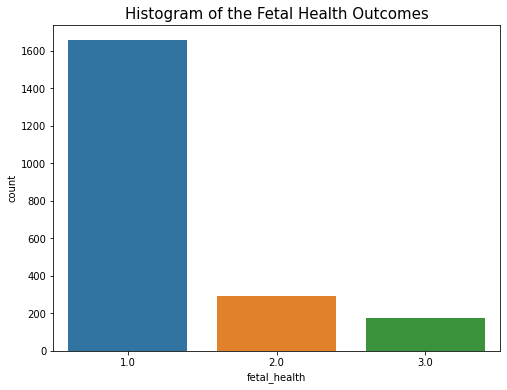

In [206]:
plt.figure(figsize = (8,6))
sns.countplot(data = fetal_health, x = 'fetal_health')
plt.title("Histogram of the Fetal Health Outcomes", fontsize = 15)
plt.show()

#### Fetal Health  
Our target feature is a categorical class for fetal heart health with 1 = Normal, 2 = Suspect, 3 = Pathological. The distribution of our three classes are very imbalanced with 'normal' measures having a count of over 1600, 'suspect' having approx 300, and 'pathological' under 200.

In [181]:
fetal_health['fetal_movement'].value_counts().sort_index()

0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.455       1
0.469       1
0.470       1
0.477       1
0.481       1
Name: fetal_movement, Length: 102, dtype: int64

In [182]:
# Get count for fetal movement values under 0.1
len(fetal_health[fetal_health['fetal_movement'] < 0.05])

2054

In [183]:
# Get number of total measurements for fetal movement
len(fetal_health['fetal_movement'])

2126

In [184]:
# Find percentage of values under 0.001 for movements per second
2054/2126

0.9661335841956726

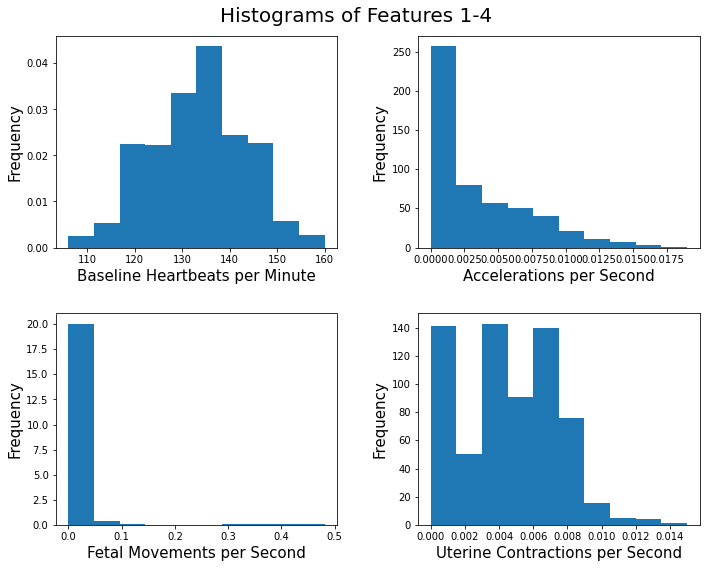

In [185]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8))
# "baseline value" histogram

fig.suptitle('Histograms of Features 1-4', fontsize=20)

ax1.hist(fetal_health['baseline value'], bins=10, density=True)
ax1.set_xlabel("Baseline Heartbeats per Minute", fontsize = 15)
ax1.set_ylabel("Frequency", fontsize = 15)


ax2.hist(fetal_health['accelerations'], bins=10, density=True)
ax2.set_xlabel( "Accelerations per Second", fontsize = 15)
ax2.set_ylabel("Frequency", fontsize = 15)


ax3.hist(fetal_health['fetal_movement'], bins=10, density=True)
ax3.set_xlabel("Fetal Movements per Second", fontsize = 15)
ax3.set_ylabel("Frequency", fontsize = 15)

ax4.hist(fetal_health['uterine_contractions'], bins=10, density=True)
ax4.set_xlabel("Uterine Contractions per Second", fontsize =15)
ax4.set_ylabel("Frequency", fontsize = 15)


# space between the plots
plt.tight_layout(w_pad = 3,h_pad = 3)
plt.show()

#### Baseline Fetal Heart Rate
The distribution of fetal heartbeat measurements is approximately normal, slightly leptokurtic, with a center around 133 beats per minute. Values range from approx 110 to 160 beats per minute. `It is a good candidate for an accurate point biserial correlation measure with the target feature.` 
#### Accelerations of Fetal Heart Rate
Values for acceleration of fetal heart rate all between approximately 0.00 to 0.0175. This distribution is sharply skewed to the right, with the most common measurements being at or near 0.000 accelerations per second.
#### Number of Fetal Movements per Second 
The distribution of values is skewed to the right and features a gap. Values range between 0 and 0.5. The histogram shows the majority of values fall at or near 0 at such a high proportion, it is diffcult to view the frequecies of higher values. A value count conducted above confirms the peak at zero accounts for nearly 97% of all observations.
#### Number of Uterine Contractions per Second  
The ditribution for uterine contractions appears positively skewed, and has a non-normal distribution. The frequencies feature three peaks. Values range between 0.000 and 0.014, with frequencies peaking around 0.00, 0.004, and 0.007. 

In [186]:
# Examing value counts for severe_declerations
fetal_health['severe_decelerations'].value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

In [187]:
# Get percentage of total represented by non-0 values
7/fetal_health['severe_decelerations'].shape[0]

0.003292568203198495

In [188]:
fetal_health['prolonged_decelerations'].value_counts()

0.000    1948
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: prolonged_decelerations, dtype: int64

In [189]:
1948/fetal_health['prolonged_decelerations'].shape[0]

0.916274694261524

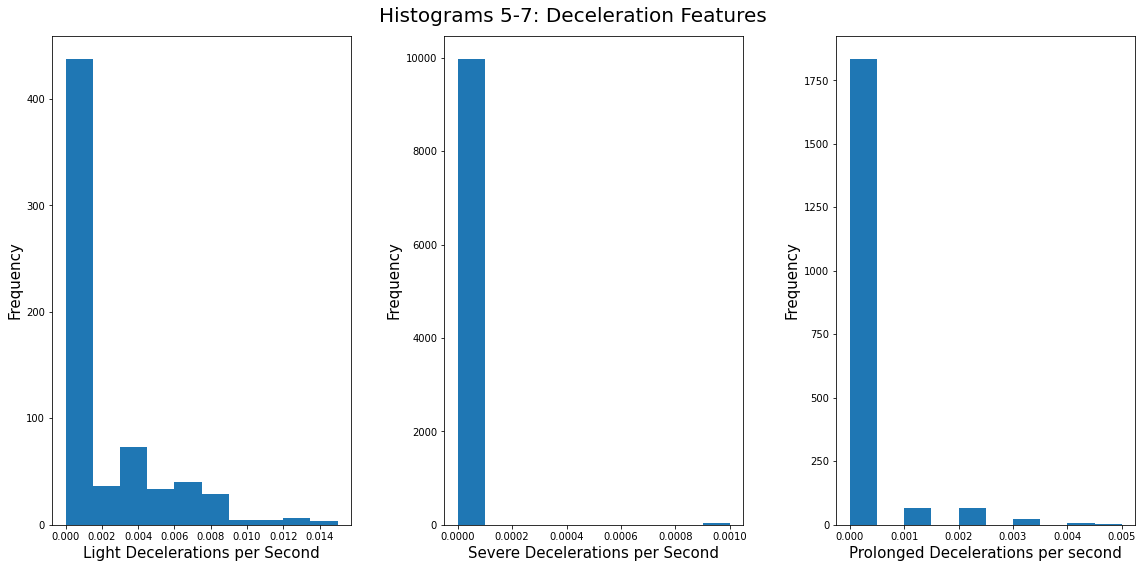

In [190]:
fig, ((ax1, ax2,ax3))= plt.subplots(1,3, figsize = (16,8))
# "baseline value" histogram

fig.suptitle('Histograms 5-7: Deceleration Features', fontsize=20)

ax1.hist(fetal_health['light_decelerations'], bins=10, density=True)
ax1.set_xlabel("Light Decelerations per Second", fontsize = 15)
ax1.set_ylabel("Frequency", fontsize = 15)


ax2.hist(fetal_health['severe_decelerations'], bins=10, density=True)
ax2.set_xlabel( "Severe Decelerations per Second", fontsize = 15)
ax2.set_ylabel("Frequency", fontsize = 15)


ax3.hist(fetal_health['prolonged_decelerations'], bins=10, density=True)
ax3.set_xlabel("Prolonged Decelerations per second", fontsize = 15)
ax3.set_ylabel("Frequency", fontsize = 15)

# space between the plots
plt.tight_layout(w_pad = 3,h_pad = 3)
plt.show()

#### Light Decelerations per Second  
Values range from 0.000 to over 0.014 light decelerations per second. The distribution is strongly positively skewed and peaks at 0.000, as the mode. 
#### Severe Decelerations per Second
The distrubution for severe decelerations is highly imbalanced and value count confirmed the values for declerations are effectively binary, with all values either at 0.000 or 0.001. Referencing value counts we find measures of 0.001 represent .3% of the total values, making them candidates to be treated as outliers. We have no reason at this time to assume these measures are mistakes, or invalid in any way, however, this distribution suggests it may not prove helpful to our model. It's correlation to our target classes will have to be explored. 
#### Prolonged Decelerations per Second
The distribution for prolonged decelerations per second is skewed to the right, peaking at 0.000. Values range from 0.000 to 0.005. Referencing value counts we find that values above 0.000 represent approx 9% of the total measurements taken. 

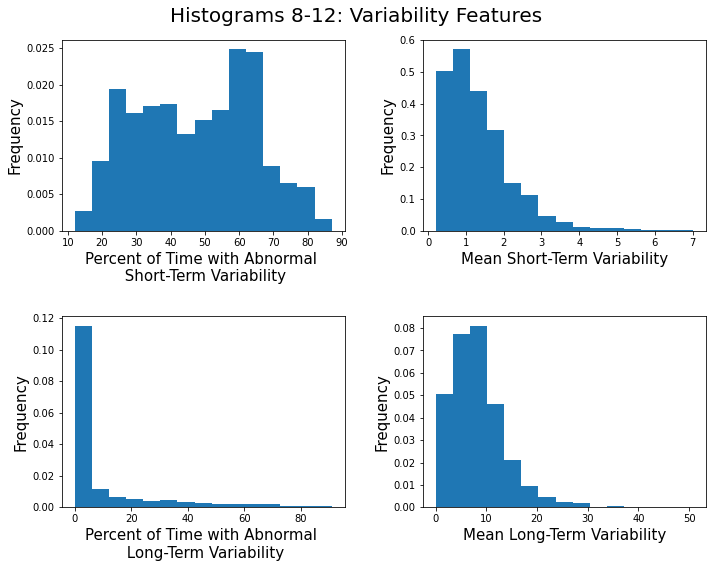

In [192]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8))
# "baseline value" histogram

fig.suptitle('Histograms 8-12: Variability Features', fontsize=20)

ax1.hist(fetal_health['pc_short_term_ab_variability'], bins=15, density=True)
ax1.set_xlabel("Percent of Time with Abnormal \n Short-Term Variability", fontsize = 15)
ax1.set_ylabel("Frequency", fontsize = 15)


ax2.(fetal_health['mean_short_term_variability'], bins=15, density=True)
ax2.set_xlabel( "Mean Short-Term Variability", fontsize = 15)
ax2.set_ylabel("Frequency", fontsize = 15)


ax3.hist(fetal_health['pc_long_term_ab_variability'], bins=15, density=True)
ax3.set_xlabel("Percent of Time with Abnormal \n Long-Term Variability", fontsize = 15)
ax3.set_ylabel("Frequency", fontsize = 15)

ax4.hist(fetal_health['mean_long_term_variability'], bins=15, density=True)
ax4.set_xlabel("Mean Long-Term Variability", fontsize =15)
ax4.set_ylabel("Frequency", fontsize = 15)


# space between the plots
plt.tight_layout(w_pad = 3,h_pad = 3)
plt.show()

#### Percent of time with Abnormal Short_term Variability
The ditribution of time appears bimodal, peaking near 25 and 60 percent.  
#### Mean Short-Term Variability

#### Pervernt of Time with Abnormal Long-Term Variability

#### Mean Long-Term Variability


In [191]:
# Display variables and their descriptions for reference
with pd.option_context('display.max_colwidth', None):
  display(var_info.style.set_properties(**{'text-align': 'left'}))

,Variable Name,Description
0,baseline value,baseline hear beats per minute
1,accelerations,accelerations per second
2,fetal_movement,fetal movements per second
3,uterine_contractions,uterine contractions per second
4,light_decelerations,light decelerations per second
5,severe_decelerations,severe decelerations per second
6,prolonged_decelerations,prolonged decelerations per second
7,pc_short_term_ab_variability,percentage of time with abnormal short term variability
8,mean_short_term_variability,mean value of short term variability
9,pc_long_term_ab_variability,percentage of time with abnormal long term variability


In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8))
# "baseline value" histogram

fig.suptitle('Histograms 8-12: Variability Features', fontsize=20)

ax1.hist(fetal_health['pc_short_term_ab_variability'], bins=15, density=True)
ax1.set_xlabel("Percent of Time with Abnormal \n Short-Term Variability", fontsize = 15)
ax1.set_ylabel("Frequency", fontsize = 15)


ax2.(fetal_health['mean_short_term_variability'], bins=15, density=True)
ax2.set_xlabel( "Mean Short-Term Variability", fontsize = 15)
ax2.set_ylabel("Frequency", fontsize = 15)


ax3.hist(fetal_health['pc_long_term_ab_variability'], bins=15, density=True)
ax3.set_xlabel("Percent of Time with Abnormal \n Long-Term Variability", fontsize = 15)
ax3.set_ylabel("Frequency", fontsize = 15)

ax4.hist(fetal_health['mean_long_term_variability'], bins=15, density=True)
ax4.set_xlabel("Mean Long-Term Variability", fontsize =15)
ax4.set_ylabel("Frequency", fontsize = 15)


# space between the plots
plt.tight_layout(w_pad = 3,h_pad = 3)
plt.show()

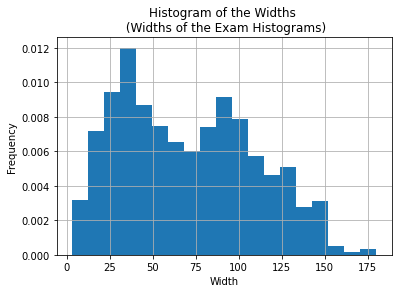

In [193]:
# "histogram_width" histogram
fetal_health['histogram_width'].hist(bins='auto', density=True)
plt.title("Histogram of the Widths \n (Widths of the Exam Histograms)")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

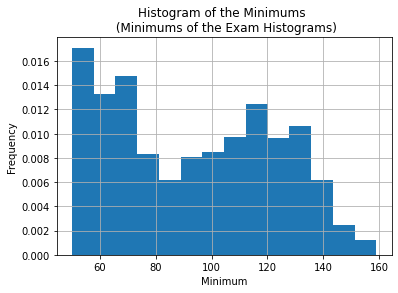

In [23]:
# "histogram_min" histogram
fetal_health['histogram_min'].hist(bins='auto', density=True)
plt.title("Histogram of the Minimums \n (Minimums of the Exam Histograms)")
plt.xlabel("Minimum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

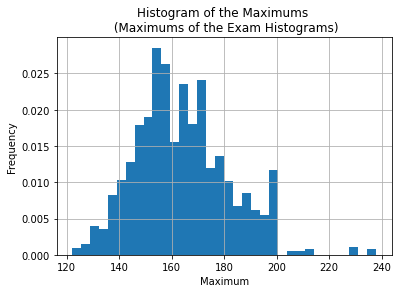

In [24]:
# "histogram_max" histogram
fetal_health['histogram_max'].hist(bins='auto', density=True)
plt.title("Histogram of the Maximums \n (Maximums of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

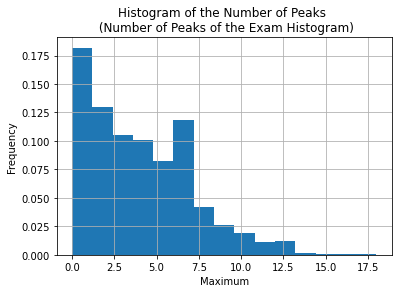

In [25]:
# "histogram_number_of_peaks" histogram
fetal_health['histogram_number_of_peaks'].hist(bins=15, density=True)
plt.title("Histogram of the Number of Peaks \n (Number of Peaks of the Exam Histogram)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

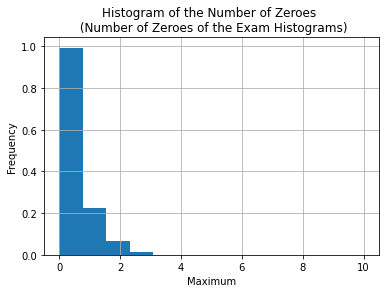

In [26]:
# "histogram_number_of_zeroes" histogram
fetal_health['histogram_number_of_zeroes'].hist(bins='auto', density=True)
plt.title("Histogram of the Number of Zeroes \n (Number of Zeroes of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

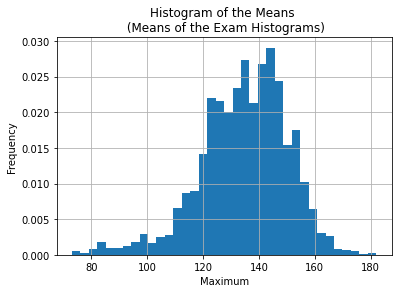

In [27]:
# "histogram_mean" histogram
fetal_health['histogram_mean'].hist(bins='auto', density=True)
plt.title("Histogram of the Means \n (Means of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

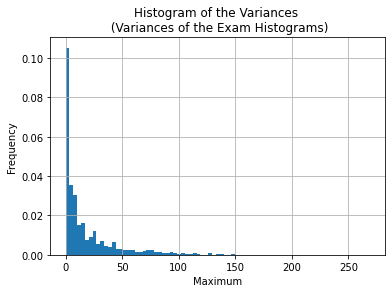

In [28]:
# "histogram_variance" histogram
fetal_health['histogram_variance'].hist(bins='auto', density=True)
plt.title("Histogram of the Variances \n (Variances of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

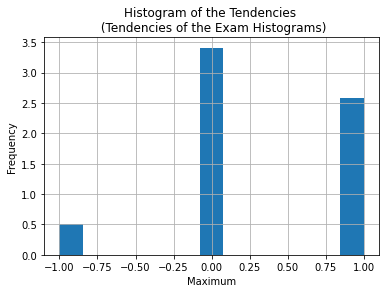

In [29]:
# "histogram_tendency" histogram
fetal_health['histogram_tendency'].hist(bins='auto', density=True)
plt.title("Histogram of the Tendencies \n (Tendencies of the Exam Histograms)")
plt.xlabel("Maximum")
plt.ylabel("Frequency")
plt.show()

Insert Graph Commentary Here

Insert Graph Commentary Here

## Bivirate EDA
### Correlations

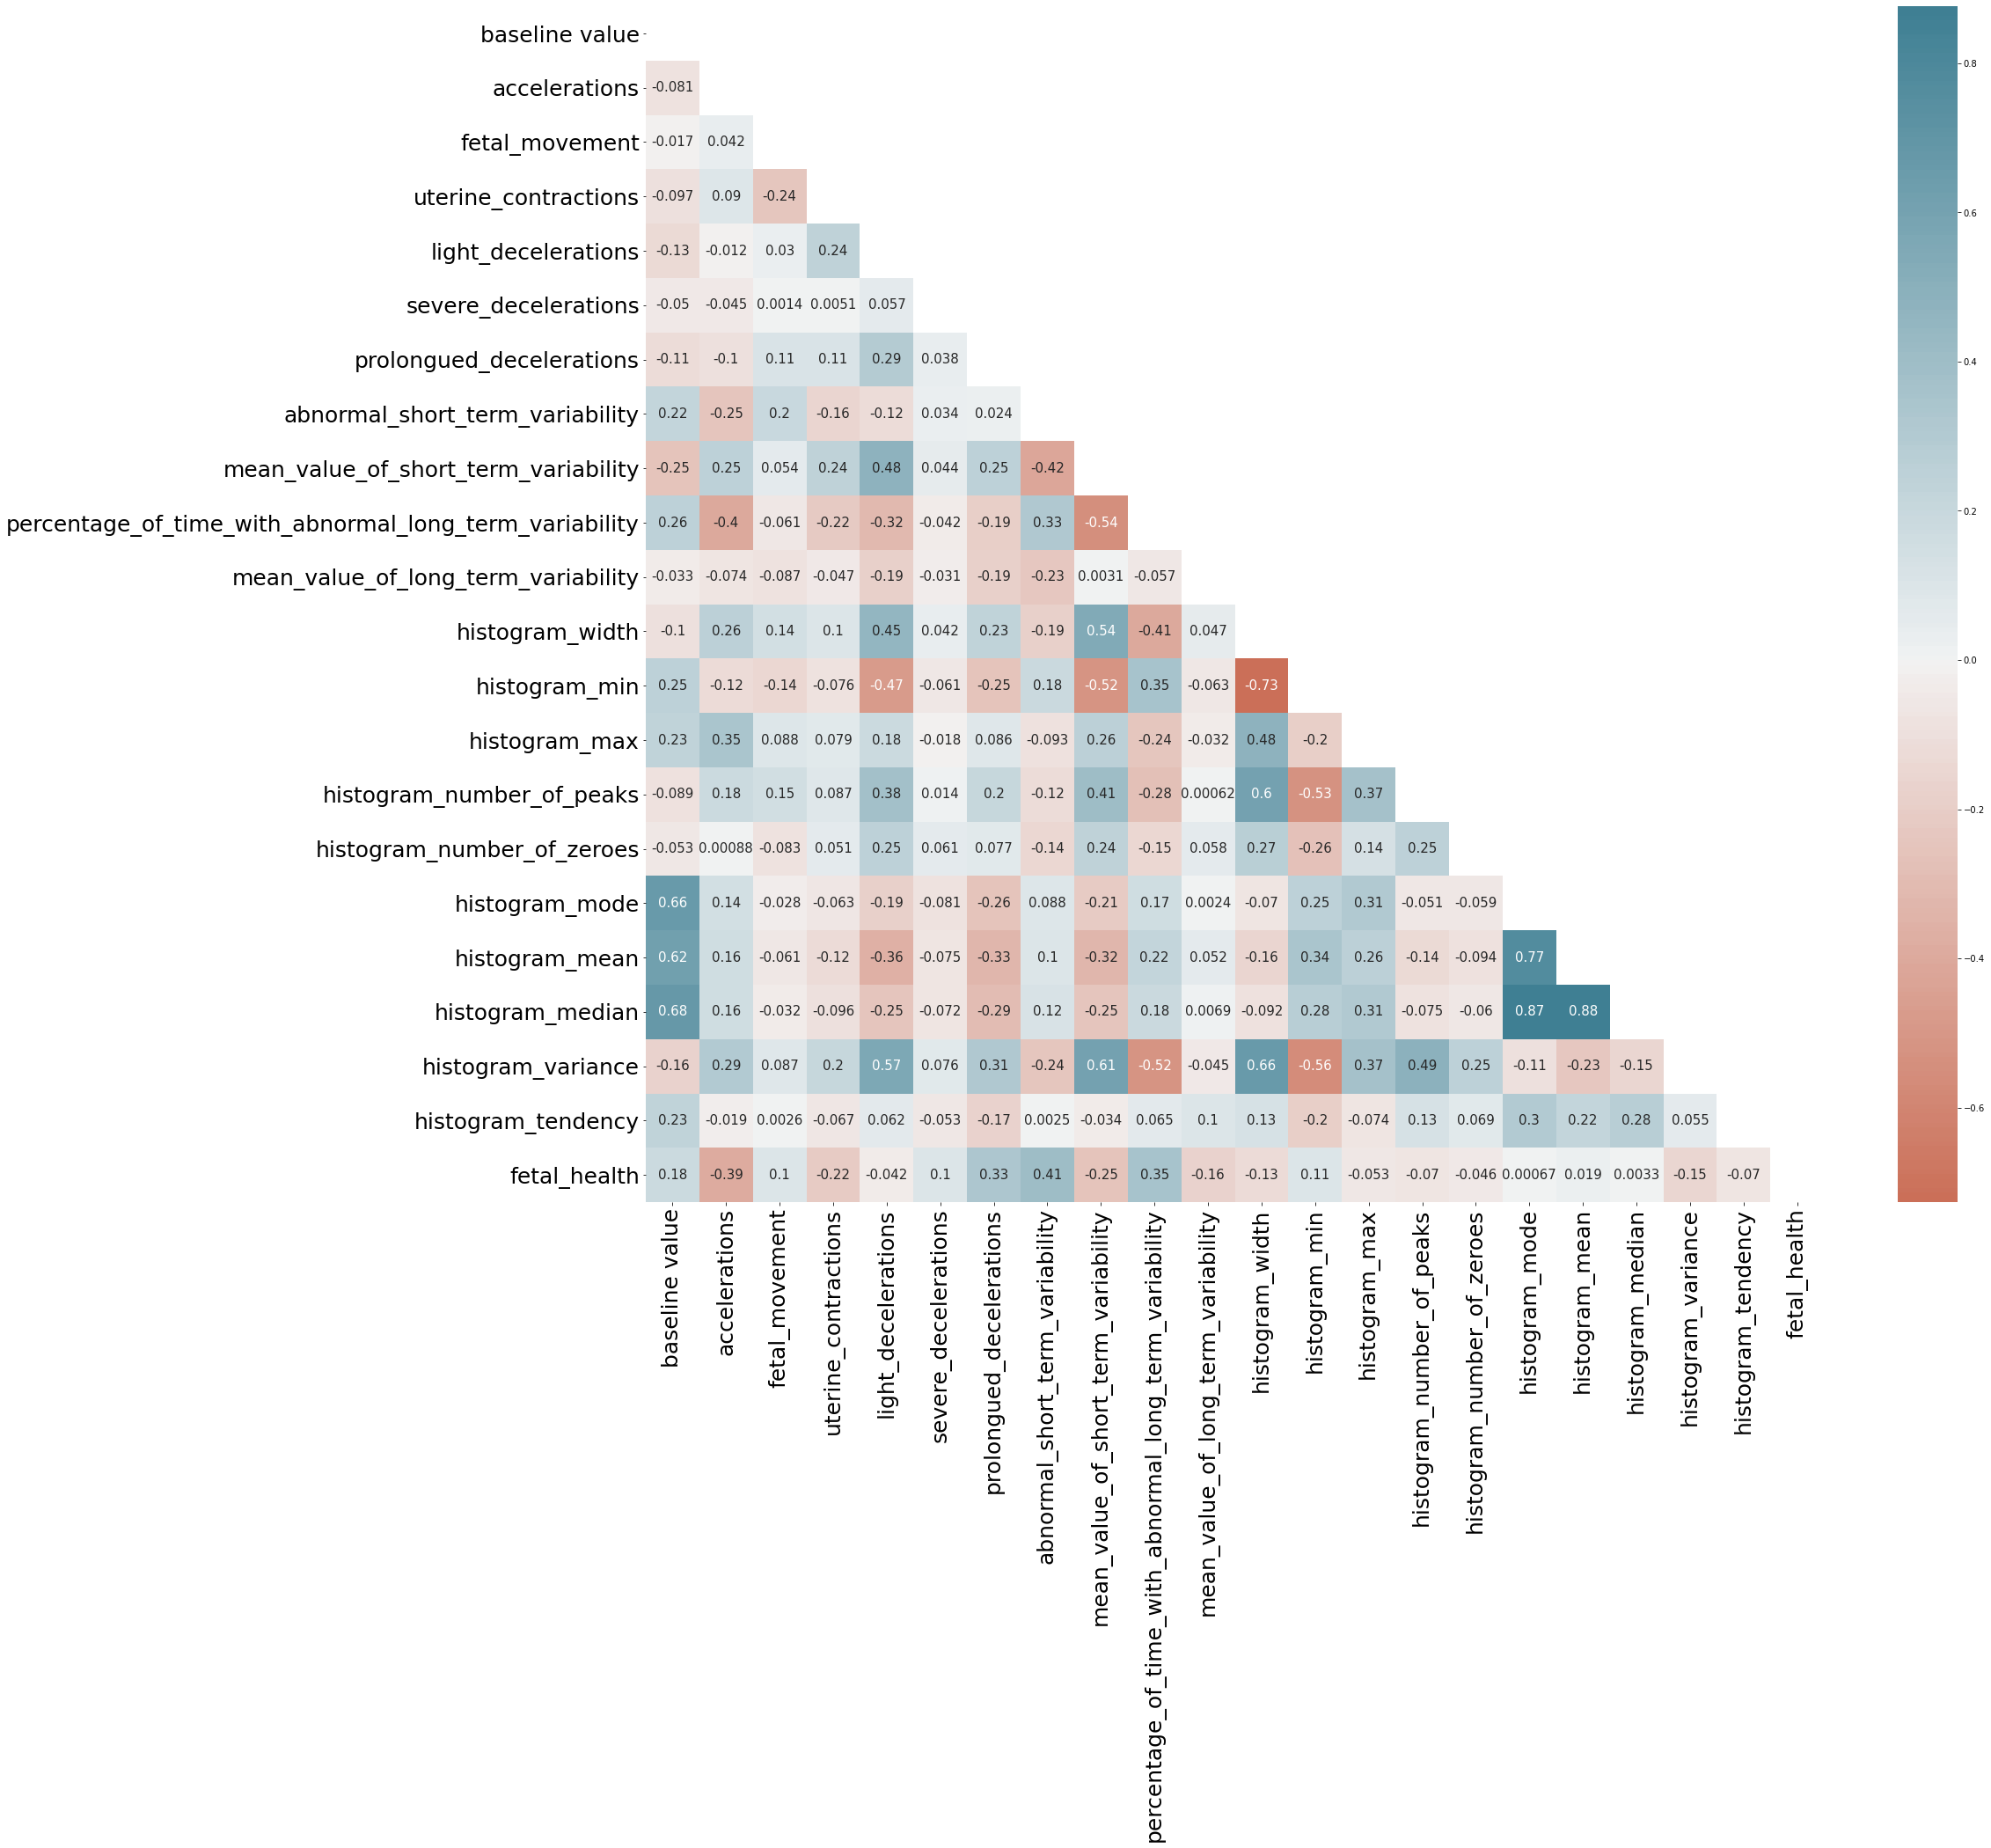

In [34]:
# Define figure sizes and axis label sizes/ticks
plt.figure(figsize = (30,25))
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
# Use a mask on the upper triangle for readability (triu - upper triangle vs tril - lower triangle)
mask = np.triu(np.ones_like(fetal_health.corr(), dtype=bool))
# Create heatmap
sns.heatmap(fetal_health.corr(method = 'kendall'),
            cmap=sns.diverging_palette(20, 220, n=200), 
            center = 0,
            mask = mask,
            annot= True,
            annot_kws = {"size": 15}
           )
plt.show()

**Note:** The correlation heatmap above provides a starting point to see potential influencing features on our heart health target. It is limited, however in only capturing linear realtionships. Given our data target is not continuous, we have opted to employ Kendall's Tau first to better see how our features to our target. The largest Tau value is abnormal short term variability at a Tau of .405. The majority of the features are correlated to our target at a Tau  less than .20. The matrix also highlights features that are correlated to each other. Some of which, may need to be removed so they do not disproportionately impact the results of our models.

In [35]:
# Removing redundant features by finding ones that are highly correlated to eachother

# create correlation matrix
corr_matrix = fetal_health.corr()

# this function highlights high correlation values 
# re-run the kernel after opening it to see highlights
def high_corr(val):
    color = 'yellow' if (val > 0.9 or val < -0.9) else ''
    return 'background-color: {}'.format(color)

# apply highlighter to matrix
corr_matrix.style.applymap(high_corr)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [36]:
fetal_health.drop(['histogram_mode','histogram_median'], axis=1, inplace=True)

From this we can see that 'histogram_mode', 'histogram_mean', and 'histogram_median' are all highly correlated, so we will drop 'histogram_mode' and 'histogram_median'.  
  
*Note: On my Week 4 HW the teacher made a note that I should explain why I removed the two out of three highly correlated variables so I guess I should explain more here as well*

### Box Plots

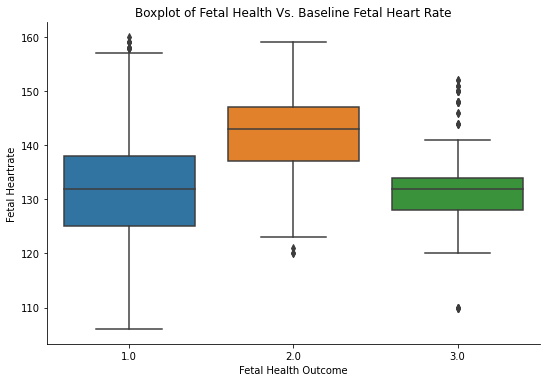

In [37]:
# boxplots of fetal health vs baseline value
sns.catplot(x="fetal_health", y="baseline value", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Baseline Fetal Heart Rate")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Fetal Heartrate")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

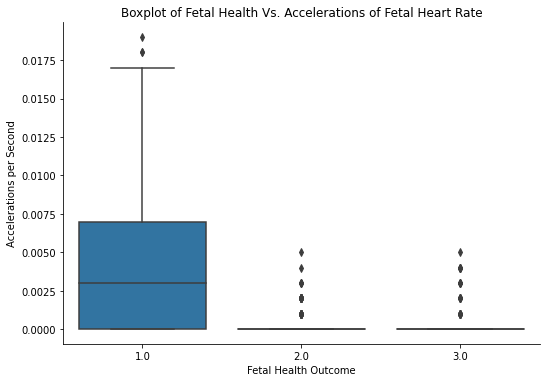

In [38]:
# boxplots of fetal health vs accelerations
sns.catplot(x="fetal_health", y="accelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Accelerations of Fetal Heart Rate")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Accelerations per Second")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

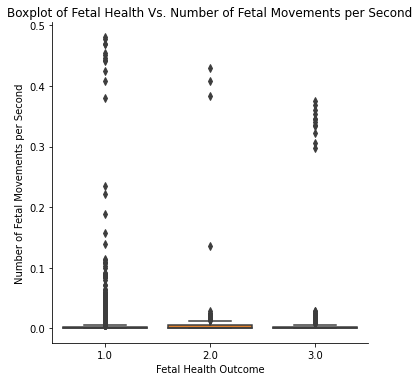

In [195]:
# boxplots of fetal health vs fetal_movement
sns.catplot(x="fetal_health", y="fetal_movement", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Fetal Movements per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Number of Fetal Movements per Second")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

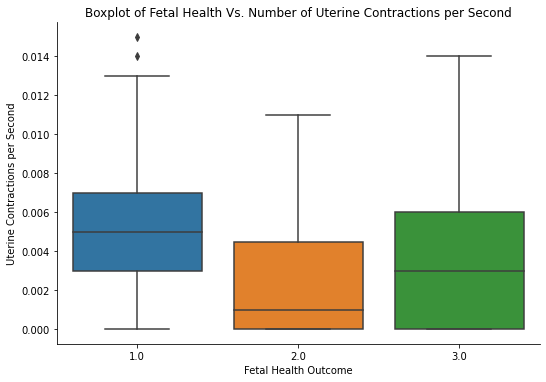

In [40]:
# boxplots of fetal health vs uterine_contractions
sns.catplot(x="fetal_health", y="uterine_contractions", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Uterine Contractions per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Uterine Contractions per Second")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

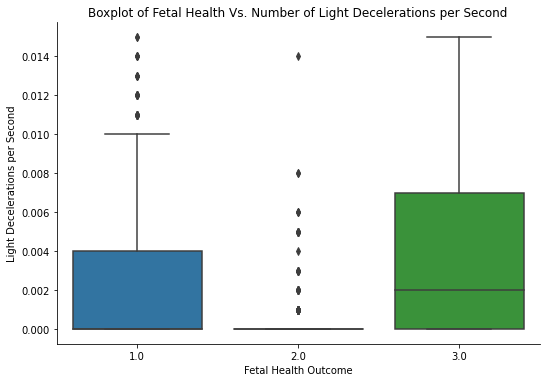

In [41]:
# boxplots of fetal health vs light_decelerations
sns.catplot(x="fetal_health", y="light_decelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Light Decelerations per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Light Decelerations per Second")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

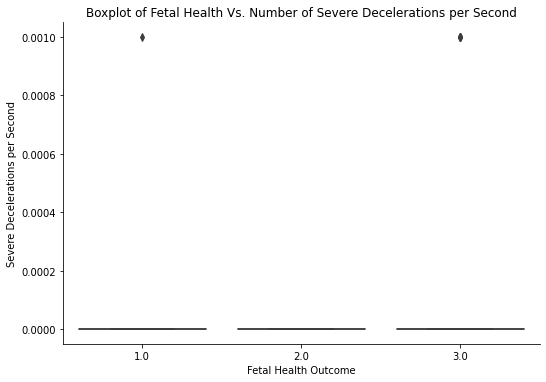

In [42]:
# boxplots of fetal health vs severe_decelerations
sns.catplot(x="fetal_health", y="severe_decelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Severe Decelerations per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Severe Decelerations per Second")
plt.xticks(rotation=0)
plt.show()

In [43]:
fetal_health['severe_decelerations'].value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

In [44]:
severe_dec = fetal_health[fetal_health['severe_decelerations'] == 0.001]
severe_dec['fetal_health']

1488    1.0
1489    3.0
1791    3.0
1792    3.0
1793    3.0
1794    3.0
1795    3.0
Name: fetal_health, dtype: float64

Insert Graph Commentary Here

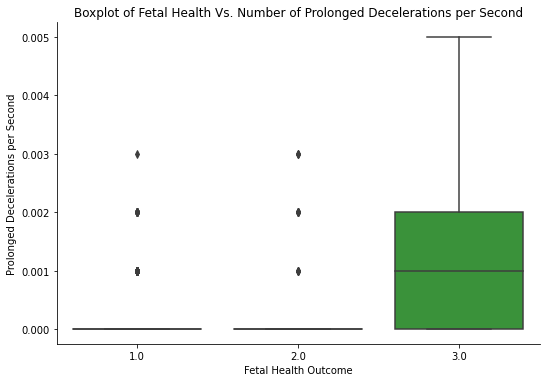

In [45]:
# boxplots of fetal health vs prolongued_decelerations
sns.catplot(x="fetal_health", y="prolongued_decelerations", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Prolonged Decelerations per Second")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Prolonged Decelerations per Second")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

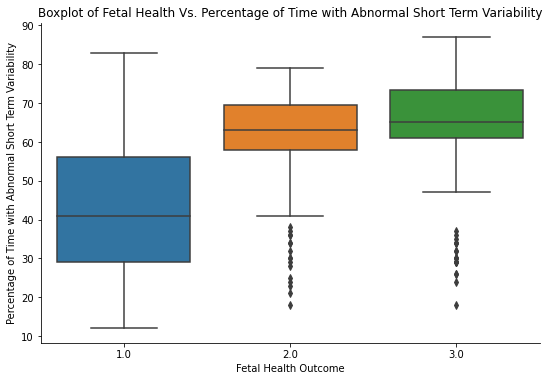

In [46]:
# boxplots of fetal health vs abnormal_short_term_variability
sns.catplot(x="fetal_health", y="abnormal_short_term_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Percentage of Time with Abnormal Short Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Percentage of Time with Abnormal Short Term Variability")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

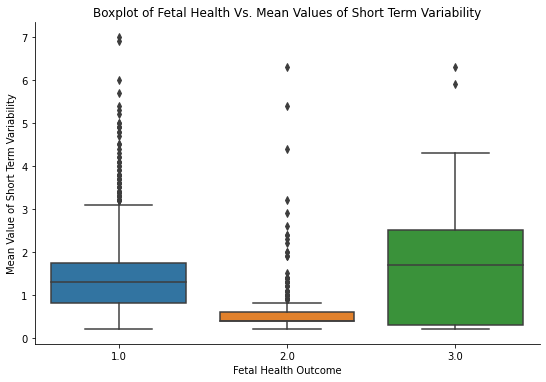

In [47]:
# boxplots of fetal health vs mean_value_of_short_term_variability
sns.catplot(x="fetal_health", y="mean_value_of_short_term_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Mean Values of Short Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Mean Value of Short Term Variability")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

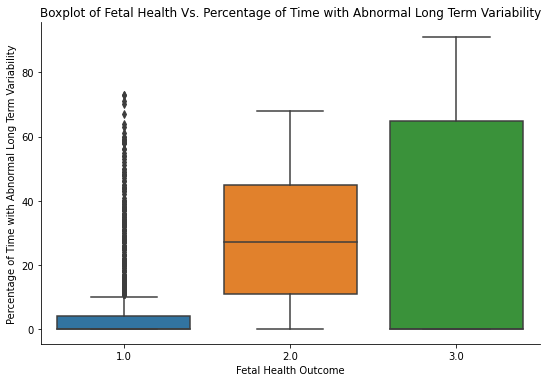

In [48]:
# boxplots of fetal health vs percentage_of_time_with_abnormal_long_term_variability
sns.catplot(x="fetal_health", y="percentage_of_time_with_abnormal_long_term_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Percentage of Time with Abnormal Long Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Percentage of Time with Abnormal Long Term Variability")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

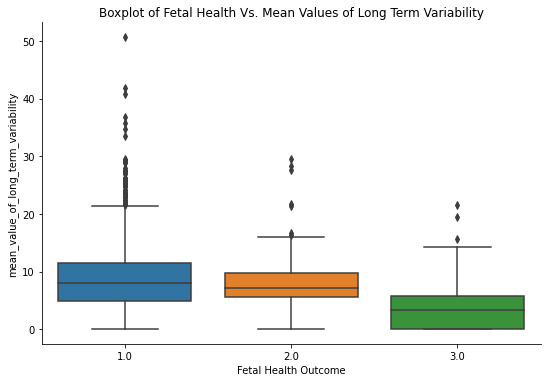

In [49]:
# boxplots of fetal health vs mean_value_of_long_term_variability
sns.catplot(x="fetal_health", y="mean_value_of_long_term_variability", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Mean Values of Long Term Variability")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("mean_value_of_long_term_variability")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

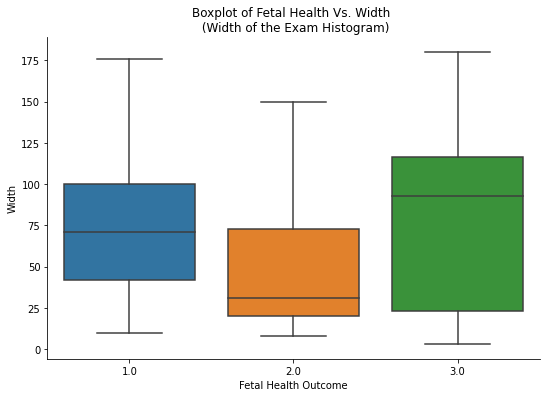

In [50]:
# boxplots of fetal health vs histogram_width
sns.catplot(x="fetal_health", y="histogram_width", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Width \n (Width of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Width")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

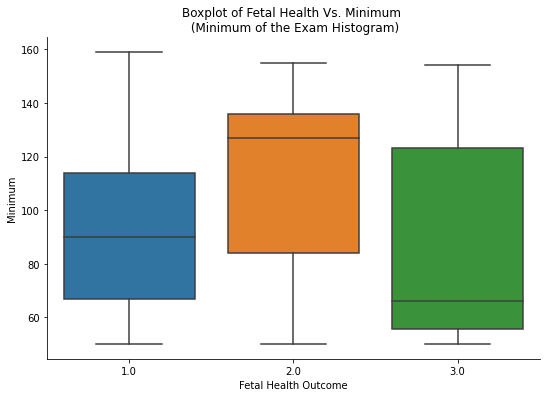

In [51]:
# boxplots of fetal health vs histogram_min
sns.catplot(x="fetal_health", y="histogram_min", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Minimum \n (Minimum of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Minimum")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

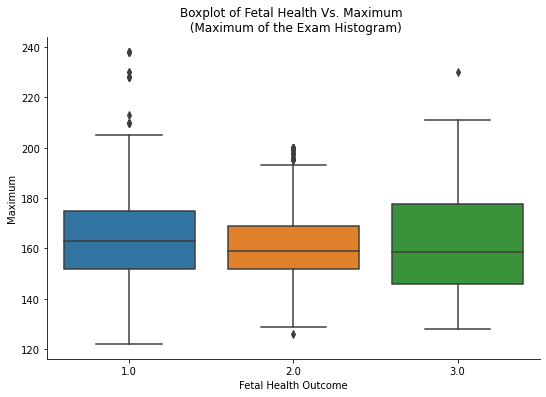

In [52]:
# boxplots of fetal health vs histogram_max
sns.catplot(x="fetal_health", y="histogram_max", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Maximum \n (Maximum of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Maximum")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

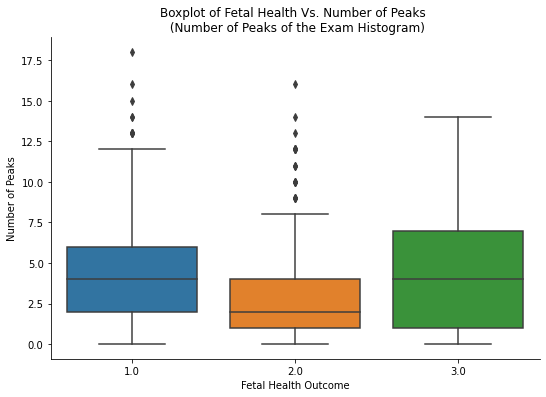

In [53]:
# boxplots of fetal health vs histogram_number_of_peaks
sns.catplot(x="fetal_health", y="histogram_number_of_peaks", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Peaks \n (Number of Peaks of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Number of Peaks")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

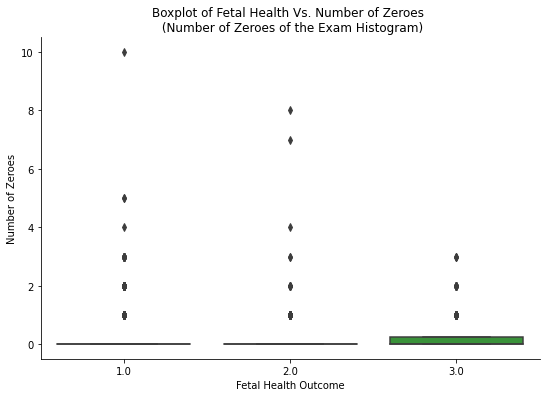

In [54]:
# boxplots of fetal health vs histogram_number_of_zeroes
sns.catplot(x="fetal_health", y="histogram_number_of_zeroes", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Number of Zeroes \n (Number of Zeroes of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Number of Zeroes")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

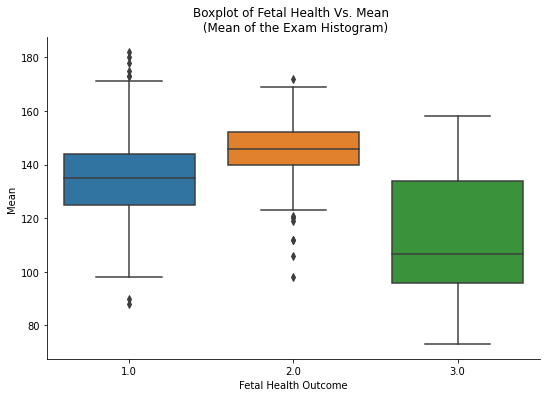

In [55]:
# boxplots of fetal health vs histogram_mean
sns.catplot(x="fetal_health", y="histogram_mean", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Mean \n (Mean of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Mean")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

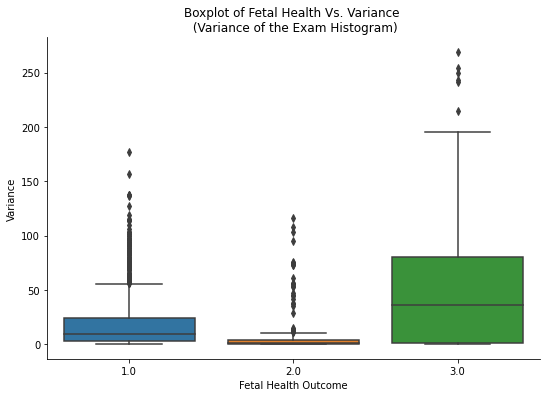

In [56]:
# boxplots of fetal health vs histogram_variance
sns.catplot(x="fetal_health", y="histogram_variance", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Variance \n (Variance of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Variance")
plt.xticks(rotation=0)
plt.show()

Insert Graph Commentary Here

#### Fetal Health Vs. Tendency

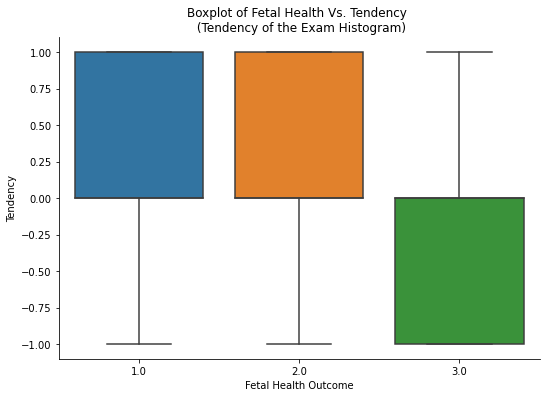

In [57]:
# boxplots of fetal health vs histogram_tendency
sns.catplot(x="fetal_health", y="histogram_tendency", data=fetal_health, kind="box", aspect=1.5)
plt.title("Boxplot of Fetal Health Vs. Tendency \n (Tendency of the Exam Histogram)")
plt.xlabel("Fetal Health Outcome")
plt.ylabel("Tendency")
plt.xticks(rotation=0)
plt.show()

In this boxplot we can see that there are no outliers in this data, and we can also see that there is a strong negative correlation between tendency and fetal health outcome.

### Missing Values

In [58]:
print('COLUMN LABEL                                          NULL VALUES \n')
for col in fetal_health.columns:
    print('{:_<60}'.format(col), fetal_health[col].isnull().sum())

COLUMN LABEL                                          NULL VALUES 

baseline value______________________________________________ 0
accelerations_______________________________________________ 0
fetal_movement______________________________________________ 0
uterine_contractions________________________________________ 0
light_decelerations_________________________________________ 0
severe_decelerations________________________________________ 0
prolongued_decelerations____________________________________ 0
abnormal_short_term_variability_____________________________ 0
mean_value_of_short_term_variability________________________ 0
percentage_of_time_with_abnormal_long_term_variability______ 0
mean_value_of_long_term_variability_________________________ 0
histogram_width_____________________________________________ 0
histogram_min_______________________________________________ 0
histogram_max_______________________________________________ 0
histogram_number_of_peaks_________________________

### Questions we need to answer:

* **Will I be able to answer the questions I want to answer with the data I have?**
* **What visualizations are especially useful for explaining my data?**
* **Do I need to adjust the data and/or driving questions?**
* **Do I need to adjust my model/evaluation choices?**
* **Are my original expectations still reasonable?**